# Ross Rondeau - Data Exploration - COVID

## Lets Make sure we have some data shall we? 

Summary: The below data shows the rate of change visually to answer the basic qustion, between any two states (Washington and Wisconsin used here) what is the rate of change for COVID cases. 

Referenced:
https://matplotlib.org
https://pandas.pydata.org/

Data From: 
https://dj2taa9i652rf.cloudfront.net/

In [2]:
import pandas,matplotlib

df=pandas.read_csv('usa-hostpital-beds.geojson')
df.head(5)

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

## Lets see what this data has to describe to us. 

In [3]:
df.describe()
df.median()
df.mode()

date       state  fips  cases  deaths
0    2020-03-28  Washington  53.0    1.0     0.0
1    2020-03-29         NaN   NaN    NaN     NaN
2    2020-03-30         NaN   NaN    NaN     NaN
3    2020-03-31         NaN   NaN    NaN     NaN
4    2020-04-01         NaN   NaN    NaN     NaN
..          ...         ...   ...    ...     ...
156  2020-08-31         NaN   NaN    NaN     NaN
157  2020-09-01         NaN   NaN    NaN     NaN
158  2020-09-02         NaN   NaN    NaN     NaN
159  2020-09-03         NaN   NaN    NaN     NaN
160  2020-09-04         NaN   NaN    NaN     NaN

[161 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10244 non-null  object
 1   state   10244 non-null  object
 2   fips    10244 non-null  int64 
 3   cases   10244 non-null  int64 
 4   deaths  10244 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 400.3+ KB


## Between New York and Wisconsin which has the worse total infections?

In [4]:
# WISCONSIN  ---------------------

# Wisconsin gets its own data frame
dfWI=df.loc[df['state'] == "Wisconsin"].sort_values(by='date')

# lets limit our data to the start of the pandemic (90 days) -- WISCONSIN IS OFFSET TO AVOID DATE ISSUES
dfWI=dfWI[25:114]

#lets remove FIPS since its only for general region
#dfWI=dfWI[['date','state','cases','deaths']]
display(dfWI.head(5))
display(dfWI.shape)


# NEW YORK ---------------------

# New York gets its own data frame
dfNY=df.loc[df['state'] == 'New York'].sort_values(by='date')

# lets limit our data to the start of the pandemic (90 days)
dfNY=dfNY[0:89]
            
#lets remove FIPS since its only for general region
#dfNY=dfNY[['date','state','cases','deaths']]
display(dfNY.head(5))
display(dfNY.shape)


date      state  fips  cases  deaths
252  2020-03-01  Wisconsin    55      1       0
267  2020-03-02  Wisconsin    55      1       0
283  2020-03-03  Wisconsin    55      1       0
300  2020-03-04  Wisconsin    55      1       0
321  2020-03-05  Wisconsin    55      1       0

(89, 5)

date     state  fips  cases  deaths
246  2020-03-01  New York    36      1       0
261  2020-03-02  New York    36      1       0
276  2020-03-03  New York    36      2       0
293  2020-03-04  New York    36     11       0
313  2020-03-05  New York    36     22       0

(89, 5)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

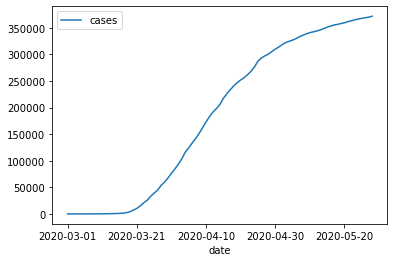

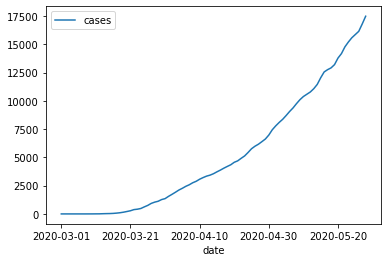

In [5]:
#plotting some generic lines to get an idea of the shape
display(dfNY.plot(x='date', y='cases'))
display(dfWI.plot(x='date', y='cases'))

### Looks like wisconsin might be increasing, lets check their rate of change

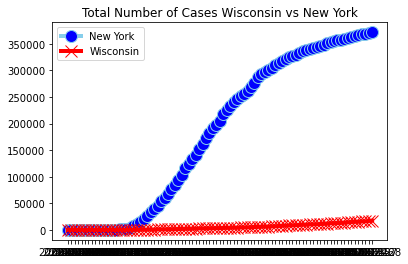

In [6]:

import matplotlib.pyplot as plt


# multiple line plot
plt.title('Total Number of Cases Wisconsin vs New York')
plt.plot( 'date', 'cases', data=dfNY, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='New York')
plt.plot( 'date', 'cases', data=dfWI, marker='x', markerfacecolor='red', markersize=12, color='red', linewidth=4, label='Wisconsin')
plt.legend()



### I dunno this looks pretty bad, lets investigate actual Rates here

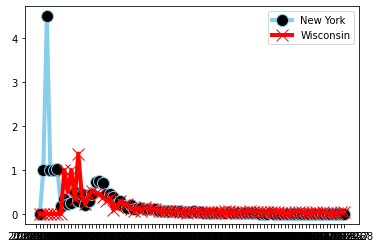

In [7]:
import matplotlib.pyplot as plt

#lets get our cases and then the deaths by themselves shall we?
#cases
pctChangeCasesNY=dfNY['cases'].pct_change()
pctChangeCasesWI=dfWI['cases'].pct_change()
#deaths
pctChangeDeathsNY=dfNY['deaths'].pct_change()
pctChangeDeathsWI=dfWI['deaths'].pct_change()

# creating our new columns!
dfNY['pctChangeCases']=pctChangeCasesNY
dfWI['pctChangeCases']=pctChangeCasesWI

dfNY['pctChangeDeaths']=pctChangeDeathsNY
dfWI['pctChangeDeaths']=pctChangeDeathsWI

#multiple line plot
plt.plot( 'date', 'pctChangeCases', data=dfNY, marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label='New York')
plt.plot( 'date', 'pctChangeCases', data=dfWI, marker='x', markerfacecolor='green', markersize=12, color='red', linewidth=4, label='Wisconsin')
plt.legend()

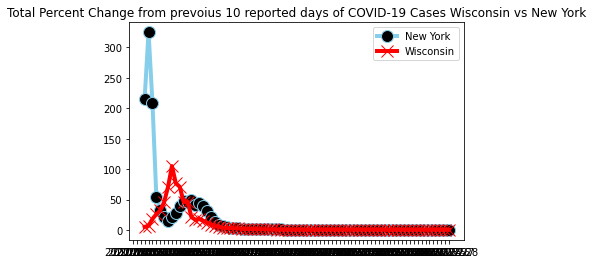

In [8]:
#lets get our cases and then the deaths by themselves shall we?
#cases
pctChangeCasesNY=dfNY['cases'].pct_change(periods=10)
pctChangeCasesWI=dfWI['cases'].pct_change(periods=10)
#deaths
pctChangeDeathsNY=dfNY['deaths'].pct_change()
pctChangeDeathsWI=dfWI['deaths'].pct_change()

# creating our new columns!
dfNY['pctChangeCases']=pctChangeCasesNY
dfWI['pctChangeCases']=pctChangeCasesWI

dfNY['pctChangeDeaths']=pctChangeDeathsNY
dfWI['pctChangeDeaths']=pctChangeDeathsWI

#multiple line plot
plt.title('Total Percent Change from prevoius 10 reported days of COVID-19 Cases Wisconsin vs New York')
plt.plot( 'date', 'pctChangeCases', data=dfNY, marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label='New York')
plt.plot( 'date', 'pctChangeCases', data=dfWI, marker='x', markerfacecolor='green', markersize=12, color='red', linewidth=4, label='Wisconsin')
plt.legend()

### Still Looks pretty bad! Lets check out that bumpy part -- CASES for the first 30 days

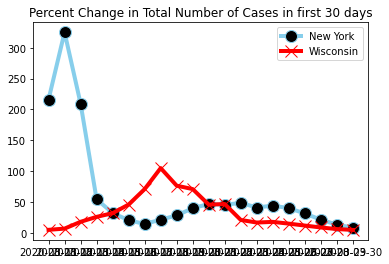

In [9]:
plt.title('Percent Change in Total Number of Cases in first 30 days')
#multiple line plot
plt.plot( 'date', 'pctChangeCases', data=dfNY[0:30], marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label='New York')
plt.plot( 'date', 'pctChangeCases', data=dfWI[0:30], marker='x', markerfacecolor='green', markersize=12, color='red', linewidth=4, label='Wisconsin')
plt.legend()

### How about Deaths? -- DEATHS for the first 90 days

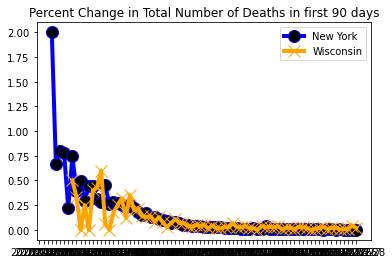

In [10]:
plt.title('Percent Change in Total Number of Deaths in first 90 days')
plt.plot( 'date', 'pctChangeDeaths', data=dfNY[0:89], marker='o', markerfacecolor='black', markersize=12, color='blue', linewidth=4, label='New York')
plt.plot( 'date', 'pctChangeDeaths', data=dfWI[0:89], marker='x', markerfacecolor='green', markersize=12, color='orange', linewidth=4, label='Wisconsin')

plt.legend()

## Lets see  what the data shows cases and deaths

array([[<AxesSubplot:title={'center':'cases'}>,
        <AxesSubplot:title={'center':'deaths'}>]], dtype=object)

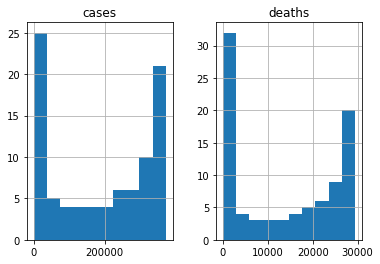

In [11]:
dfNYhist=dfNY[['date','state','cases','deaths']]
dfNYhist.hist()

array([[<AxesSubplot:title={'center':'cases'}>,
        <AxesSubplot:title={'center':'deaths'}>]], dtype=object)

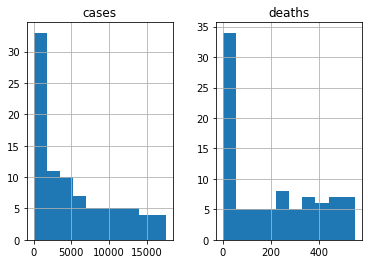

In [12]:
dfWIhist=dfWI[['date','state','cases','deaths']]
dfWIhist.hist()

# Conclusion:

While wisconsin and Washington have very different initial lines, one might be willing to say "its more dangerous to live in X than Y". During the initial outspread the New York response was highly effective at mitigating the spread of cases of COVID-19. Relatively speaking if were talking about per-capita 